# Machine Learning Algorithms 

### by **[NimbleBox](https://www.nimblebox.ai)** 

<a href="https://www.nimblebox.ai"><img src="./assets/nbx.jpeg" alt="NimbleBox.ai logo" width="600"/></a>

This notebook contains parts from [K-mean clustering](https://github.com/greeshmariya/K-means-Clustering-from-scratch) and [Support vector machine](https://github.com/adityajn105/SVM-From-Scratch).

## Things we will learn
 
- Support Vector Machines (SVM)
- K-means Clustering 
 
Let's get ourselves a bit familiar with both of these then we can delve deep into understanding them. Let's start with K-means clustering as you have already seen a example of it, where you may ask, In the first notebook where we had the features of students and we wanted to categories students into three groups but we didn't had any labels and so this algorithm comes under the realm of unsupervised learning where you have the data but not the data labels. Now let's talk about Support Vector Machines. You have seen the type of problems it can solve and those are regression and classification of which you saw an example in the first notebook and used linear regression in the second notebook to solve the regression problem and used logistic regression to solve the classification problem, Today we are going to use SVM to solve a classification problem.
 
Now let's take a closer look at both of them.
 

## K-means Clustering
 
The **K** in the K-means clustering algorithm denotes the number of groups or formally called clusters you want to divide the dataset in. The choice of **K** generally depends on the type of dataset you are working with.
 
Today we are going to understand the working of K-means through a dataset of customers in a shopping mall, But before going any further let's figure out how K-means is going to do that and how will it group the customers in different clusters. 
 
### Steps
 
1. **Normalize the data:** This may seem like a trivial step but normalizing the data for algorithms like K-means clustering makes a huge difference in how many steps it takes to converge(to find good clusters).
2. **Select Number of clusters:** Generally the clusters are sampled from the data that you have but you can also randomly sample the clusters within a range of your dataset.
3. **Calculate the distance:** Calculate the distance of every datapoint from the cluster centres, We are going to use frobenius norm or the Euclidean norm(they both are the same thing) to measure the distance you can use something else to measure the distance too.
<img src="./assets/distance.png" width=200>
4. **Move The clusters:** The clusters are then moved to the points to which they were close to.
5. **Repeat:** Repeat step 3 to 4 from some number of iterations until the clusters are assigned to a group that you seem fit.
 
### Implementation   
 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy

In [2]:
dataset = pd.read_csv("./assets/mall_customers.csv")
dataset = dataset.drop(["CustomerID", "Gender", "Age"], axis=1)
print(dataset.head())

   AnnualEarning   SpendingScore
0              15             39
1              15             81
2              16              6
3              16             77
4              17             40


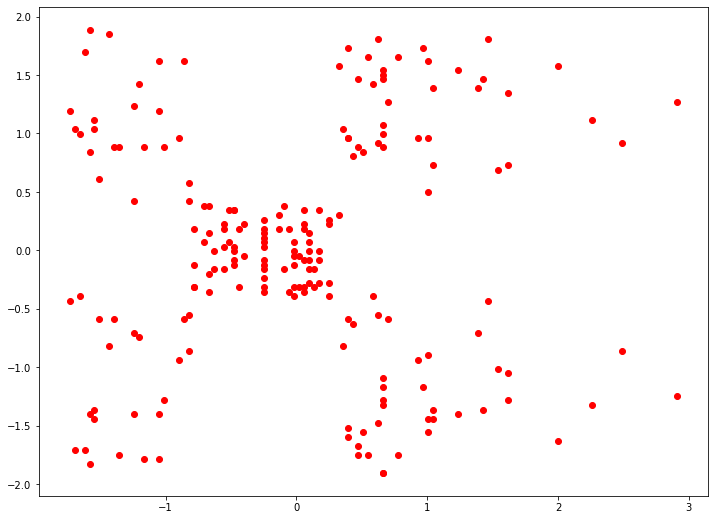

In [3]:
# Data normalization 
dataset = (dataset - dataset.mean()) / dataset.std()
data_points = dataset.to_numpy()

# Modifying the plot size globally.
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Plot data points
plt.scatter(data_points[:,0], data_points[:,1], color='r')

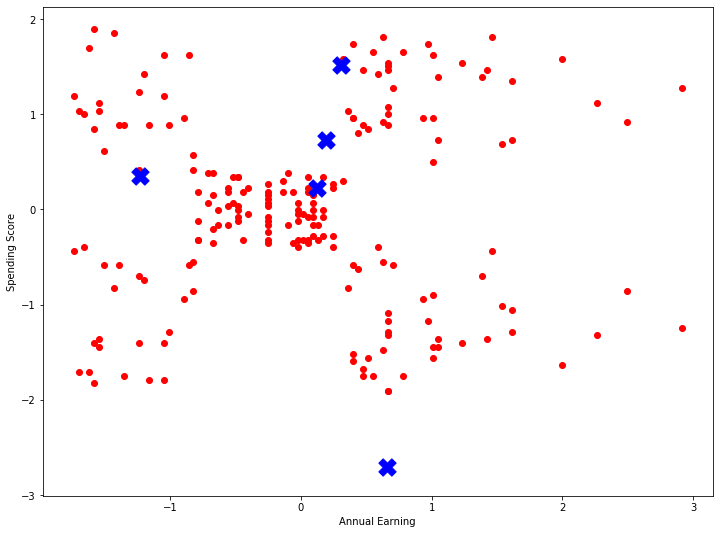

In [4]:
# Number of clusters
k = 5
# Number of training data
n = data_points.shape[0]
# Number of features in the data
c = data_points.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data_points, axis = 0)
std = np.std(data_points, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
plt.scatter(data_points[:,0], data_points[:,1], color='r')
plt.scatter(centers[:,0], centers[:,1], marker='X', c='b', s=300)
plt.xlabel("Annual Earning")
plt.ylabel("Spending Score")
plt.show()

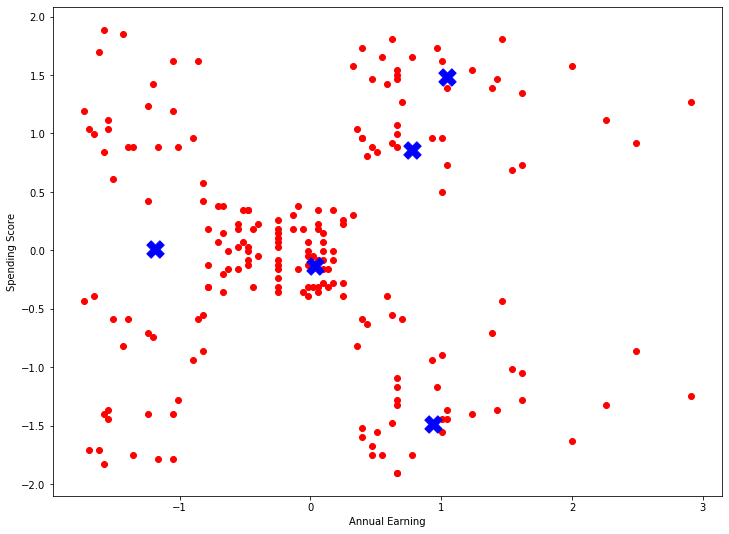

In [5]:
centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

data_points.shape
# clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)

# Number of iterations to run K-means for
for _ in range(500):
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(data_points - centers[i], axis=1)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(data_points[clusters == i], axis=0)
    
# Plot the data and the cluster centers
plt.scatter(data_points[:,0], data_points[:,1], color='r')
plt.scatter(centers_new[:,0], centers_new[:,1], marker='X', color='b', s=300)
plt.xlabel("Annual Earning")
plt.ylabel("Spending Score")
plt.show()

Here we apply step **5**, We calculate the distance, move the clusters and repeat these steps for some iterations. Here we have used 500 so that means it will calculate distance from all data points and move the centroids 500 times. 

## Support Vector Machines

SVM can be used for classification, How does it to that, It does that by finding the best line in two dimensions or the best hyperplane in more than two dimensions in order to help us separate our space into classes. The hyperplane (line) is found through the maximum margin. i.e the maximum distance between data points of both classes.

### Hyperplane and Margin

The vector points closest to the hyperplane are known as the support vector points because only these two points are contributing to the result of the algorithm, other points are not. If a data point is not a support vector, removing it has no effect on the model. On the other hands, deleting the support vectors will then change the position of the hyperplane.

The dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. It becomes difficult to imagine when the number of features exceeds 3.

The distance of the vectors from the hyperplane is called the margin which is a separation of a line to the closest class points. We would like to choose a hyperplane that maximises the margin between classes. 



<img src="./assets/svm.png" width="600"/>


Computing the (soft-margin) SVM classifier amounts to minimizing an expression of the form


<img src="./assets/svm_formula.png" width="600"/>



### SVM Algorithm :

   * For all xi in training Data:
       *    ```
		 	xi.w + b <= -1 if yi = -1 (belongs to -ve class)
		 	xi.w + b >= +1 if yi = +1 (belongs to +ve class)
                                  or
                             yi(xi.w+b) >= 1

            ```
   * for all support vectors(SV) (data points which decides margin)
       *    ```
			xi.w+b = -1    here xi is -ve SV and yi is -1
			xi.w+b = +1    here xi is +ve SV and yi is +1
			```
   * For decision Boundary `yi(xi.w+b)=0` here xi belongs to point in decision boundary
   * Our Objective is to maximize Width W
		* `W = ((X+ - X-).w)/|w|`
		* or we can say minimize |w|
   * Once we have found optimized w and b using algorithm
		* `x.w+b = 1` is line passing through +ve support vectors
		* `x.w+b = -1` is line passing through -ve support vectors
		* `x.w+b = 0` is decision boundary
   * It is not necessary that support vector lines always pass through support vectors
   * It is a Convex Optimization problem and will always lead to a global minimum
   * This is Linear SVM means kernel is linear

3. Algorithm in Code (See code for better understanding)
	* Start with random big value of w say(w0,w0) we will decrease it later
	* Select step size as `w0*0.1` 
	* A small value of b, we will increase it later
		* b will range from (-b0 < b < +b0, step = `step*b_multiple`)
		* This is also computational expensive. So select b0 wisely 
	* We will check for points xi in dataset:
		* Check will for all transformation of w like (w0,w0), (-w0,w0), (w0,-w0), (-w0,-w0)
		* if not `yi(xi.w+b)>=1` for all points then break
		* Else find |w| and put it in dictionary as key and (w,b) as values                 
		* If w<=0 then current step have been completed and go to step 6
		* Else decrease w as (w0-step,w0-step) and continue with step 3
	*  Do this step until step becomes `w0*0.001` because futher it will be point of expense
		* `step = step*0.1` 
		* go to step 3
	* Select (w,b) which has min |w| form the dictionary 
    
### Implementation   

In [6]:
class SVM(object):
    def __init__(self,visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    
    def fit(self,data):
        #train with data
        self.data = data
        # { |\w\|:{w,b}}
        opt_dict = {}
        
        transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
        
        all_data = np.array([])
        for yi in self.data:
            all_data = np.append(all_data,self.data[yi])
                    
        self.max_feature_value = max(all_data)         
        self.min_feature_value = min(all_data)
        all_data = None
        
        #with smaller steps our margins and db will be more precise
        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      #point of expense
                      self.max_feature_value * 0.001,]
        
        #extremly expensise
        b_range_multiple = 5
        #we dont need to take as small step as w
        b_multiple = 5
        
        latest_optimum = self.max_feature_value*10
        
        """
        objective is to satisfy yi(x.w)+b>=1 for all training dataset such that ||w|| is minimum
        for this we will start with random w, and try to satisfy it with making b bigger and bigger
        """
        #making step smaller and smaller to get precise value
        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            
            #we can do this because convex
            optimized = False
            while not optimized:
                for b in np.arange(-1*self.max_feature_value*b_range_multiple,
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        
                        #weakest link in SVM fundamentally
                        #SMO attempts to fix this a bit
                        # ti(xi.w+b) >=1
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b)>=1:
                                    found_option=False
                        if found_option:
                            """
                            all points in dataset satisfy y(w.x)+b>=1 for this cuurent w_t, b
                            then put w,b in dict with ||w|| as key
                            """
                            opt_dict[np.linalg.norm(w_t)]=[w_t,b]
                
                #after w[0] or w[1]<0 then values of w starts repeating itself because of transformation
                #Think about it, it is easy
                #print(w,len(opt_dict)) Try printing to understand
                if w[0]<0:
                    optimized=True
                    print("optimized a step")
                else:
                    w = w-step
                    
            # sorting ||w|| to put the smallest ||w|| at poition 0 
            norms = sorted([n for n in opt_dict])
            #optimal values of w,b
            opt_choice = opt_dict[norms[0]]

            self.w=opt_choice[0]
            self.b=opt_choice[1]
            
            #start with new latest_optimum (initial values for w)
            latest_optimum = opt_choice[0][0]+step*2
    
    def predict(self,features):
        #sign(x.w+b)
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification!=0 and self.visualization:
            self.ax.scatter(features[0],features[1],s=200,marker='*',c=self.colors[classification])
        return (classification,np.dot(np.array(features),self.w)+self.b)
    
    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,c=self.colors[i]) for x in data_dict[i]] for i in data_dict]
        
        # hyperplane = x.w+b (actually its a line)
        # v = x0.w0+x1.w1+b -> x1 = (v-w[0].x[0]-b)/w1
        #psv = 1     psv line ->  x.w+b = 1a small value of b we will increase it later
        #nsv = -1    nsv line ->  x.w+b = -1
        # dec = 0    db line  ->  x.w+b = 0
        def hyperplane(x,w,b,v):
            #returns a x2 value on line when given x1
            return (-w[0]*x-b+v)/w[1]
       
        hyp_x_min= self.min_feature_value*0.9
        hyp_x_max = self.max_feature_value*1.1
        
        # (w.x+b)=1
        # positive support vector hyperplane
        pav1 = hyperplane(hyp_x_min,self.w,self.b,1)
        pav2 = hyperplane(hyp_x_max,self.w,self.b,1)
        self.ax.plot([hyp_x_min,hyp_x_max],[pav1,pav2],'k')
        
        # (w.x+b)=-1
        # negative support vector hyperplane
        nav1 = hyperplane(hyp_x_min,self.w,self.b,-1)
        nav2 = hyperplane(hyp_x_max,self.w,self.b,-1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nav1,nav2],'k')
        
        # (w.x+b)=0
        # db support vector hyperplane
        db1 = hyperplane(hyp_x_min,self.w,self.b,0)
        db2 = hyperplane(hyp_x_max,self.w,self.b,0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2],'y--')

In [7]:
#defining a basic data
data_dict = {-1:np.array([[1,7],[2,8],[3,8]]),1:np.array([[5,1],[6,-1],[7,3]])}

optimized a step
optimized a step
optimized a step


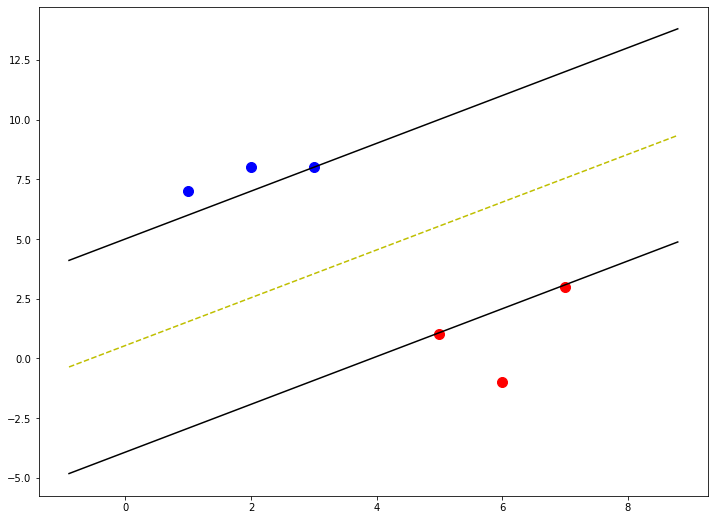

In [8]:
svm = SVM() # Linear Kernel
svm.fit(data=data_dict)
svm.visualize()

In [9]:
svm.predict([3,8])

(-1.0, -1.000000000000098)